## 데이터 다루기

데이터를 얻었을 때 제일 먼저 할 일은 데이터의 탐색이다. 데이터의 성질과 모양을 알아야 그에 적합한 모델을 만들 수 있다.

### 1차원 데이터 탐색

숫자로만 구성된 1차원적인 데이터를 탐색할 때는 요약 통계치를 계산해야 한다. 여기에는 데이터의 개수, 최솟값, 최댓값, 평균, 표준편차 등이 있다.
물론 통계치가 무의미한 경우도 있다. 그럴 때에는 범위를 구간으로 나누고 구간 내의 데이터 개수를 살펴보는 히스토그램을 만들자.

In [148]:
import math, random
from stats import correlation
from matplotlib import pyplot as plt
from collections import Counter
from probability import inverse_normal_cdf

def bucketize(point, bucketSize):
    return bucketSize * math.floor(point / bucketSize)

def make_histogram(points, bucketSize):
    return Counter(bucketize(point, bucketSize) for point in points)

def plot_histogram(points, bucketSize, title=""):
    histogram = make_histogram(points, bucketSize)
    plt.bar(histogram.keys(), histogram.values(), width=bucketSize, color = 'orange')
    plt.title(title)
    plt.show()
    
random.seed(0)

# -100 ~ 100 사이의 균등분포(uniform distribution)
uniform = [200 * random.random() - 100 for _ in range(10000)]

# 평균 0, 표준편차 57
normal = [57 * inverse_normal_cdf(random.random()) 
          for _ in range(10000)]

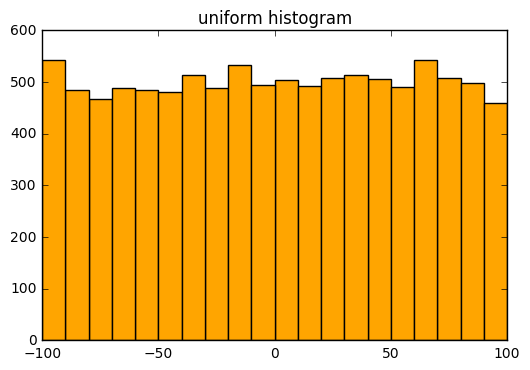

In [136]:
plot_histogram(uniform, 10, "uniform histogram")

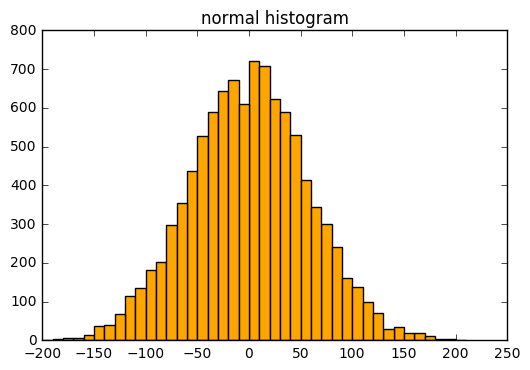

In [150]:
plot_histogram(normal, 10, "normal histogram")

## 2차원 데이터

2차원 데이터에서는 각 변수를 살펴보는 것도 좋지만 두 변수가 2차원 공간상에서 어떻게 분포를 이루는지 살펴보는 것에 의미가 있다.

In [151]:
def random_normal():
    return inverse_normal_cdf(random.random())

xs = [random_normal() for _ in range(1000)]
ys1 = [x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

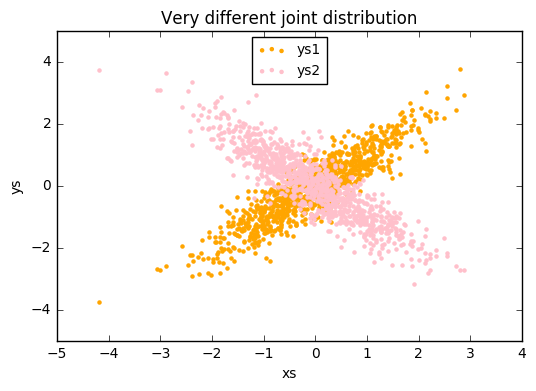

In [147]:
plt.scatter(xs, ys1, marker='.', color='orange', label='ys1')
plt.scatter(xs, ys2, marker='.', color='pink', label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.title("Very different joint distribution") #joint distribution = 결합확률분포
plt.legend(loc=9, prop={'size':10})
plt.show()

In [143]:
print(correlation(xs, ys1))
print(correlation(xs, ys2))

0.9010493686379609
-0.8920981526880033


### 다차원의 데이터 다루기

2차원 데이터를 산포도로 표현한 것처럼 이보다 고차원의 데이터 또한 산포도 행렬(scattter plot matrix)로 시각화해 데이터관의 상관관계를 파악해볼 수도 있다.

## 정제하고 합치기

실제 데이터는 굉장히 지저분하다. 보통은 데이터를 사용하기 전에 정제과정을 거쳐야 한다. 문자열을 정수형으로 바꿔야 할 수도 있다. 
또 데이터의 안에 나쁜 데이터가 있을 수도 있다. 정수가 있어야 할 행에 문자열이 있다면 해당 문자열을 무시하는 게 더 나을지도 모른다.
나쁜 데이터를 처리하는 방법은 크게 세 가지로, 그 데이터를 없애거나, 직접 수정하거나, 그런 데이터가 없다고 비는 것이다.
또 데이터에는 이상치가 있을 수도 있다. 3017년 설연휴의 교통상황이라던지말이다. 이런 이상치를 발견하고 수정하는 작업도 때때로 필요할 수 있다.

## 척도 조절

데이터 과학 기법은 보통 데이터의 척도(scale)에 민감하다. 파이썬 사용자 수백 명의 키와 몸무게가 주어졌고 이를 통해 체형을 군집화 한다고 가정해보자.
직관적인 데이터라면 가까운 데이터는 같은 군집에 포함돼 있어야 한다. 그러기 위해서는 데이터 간의 거리를 재어야 하는데, 이 때에 유클리드 거리 함수를 사용할 수 있다.
하지만 만약 파이썬 사용자의 몸무게가 각각 kg과 파운드로 적혀있다면, 비슷한 체형을 가진 사람들을 군집화할 때 척도에 따라 결과가 다르게 나타날 수 있다. 이렇게 각 차원의 수치가 다른 경우 각 차원의 평균을 0, 표준편차를 1로 변환시키면서 척도를 조절할 수 있다.

## 차원 축소

주어진 데이터의 차원이 유효하지 않을 때가 있다. 그럴 때에는 잡음에 해당되는 차원을 제거하고 밀접한 연관 차원을 합쳐주면서 데이터를 정제해야 한다. 저차원의 데이터가 고차원 데이터에서 사용할 수 없었던 더 다양한 기법을 사용할 수 있는 경우도 있다. 다만 차원을 축소하면 더 좋은 성능의 모형을 만들 수는 있지만 만들어진 모형의 해석은 어려워진다.